# Titanic - Machine Learning from Disaster
This notebook demonstrates the full machine learning lifecycle on the Titanic dataset.  
The workflow includes:  
1. Exploratory Data Analysis (EDA)  
2. Data Preprocessing and Feature Engineering  
3. Model Training and Evaluation  
4. Ethical Analysis  
5. Model Comparison and Results

Find the
[Referance](https://www.kaggle.com/c/titanic) via this link to the Titanic - Machine Learning from Disaster

⭕⭕⭕⭕ NOTE: Whole documents is split with "TEXT" "CODE" patten, "Run all" for prevent runtime issues. ⭕⭕⭕⭕

## Import Libraries

In [459]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE  # For handling data imbalance
from google.colab import drive
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

## Connect dataset via Google Drive

In [460]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and Titanic Dataset

This section loads the Titanic dataset and performs an initial exploration to understand its structure, missing values, and distributions.


In [461]:
# Paths to the dataset files
train_data_path = "/content/drive/MyDrive/assesment_dataset/train.csv"
test_data_path = "/content/drive/MyDrive/assesment_dataset/test.csv"

# Load the training dataset
df = pd.read_csv(train_data_path)

## Exploratory Data Analysis (EDA)



- Data Overview:

  - Prints the first few rows to get a quick look at the dataset.
  - Provides summary statistics for numerical columns.

In [462]:
# Display dataset overview

# 1. Overview of the dataset
print("Dataset Overview:\n", df.info())
print(df.head())
print("\nSummary Statistics:")
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Dataset Overview:
 None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

   

- Handling Missing Values:

  - Displays the count of missing values for each column.
  - Uses missingno library to visualize missing data patterns.


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


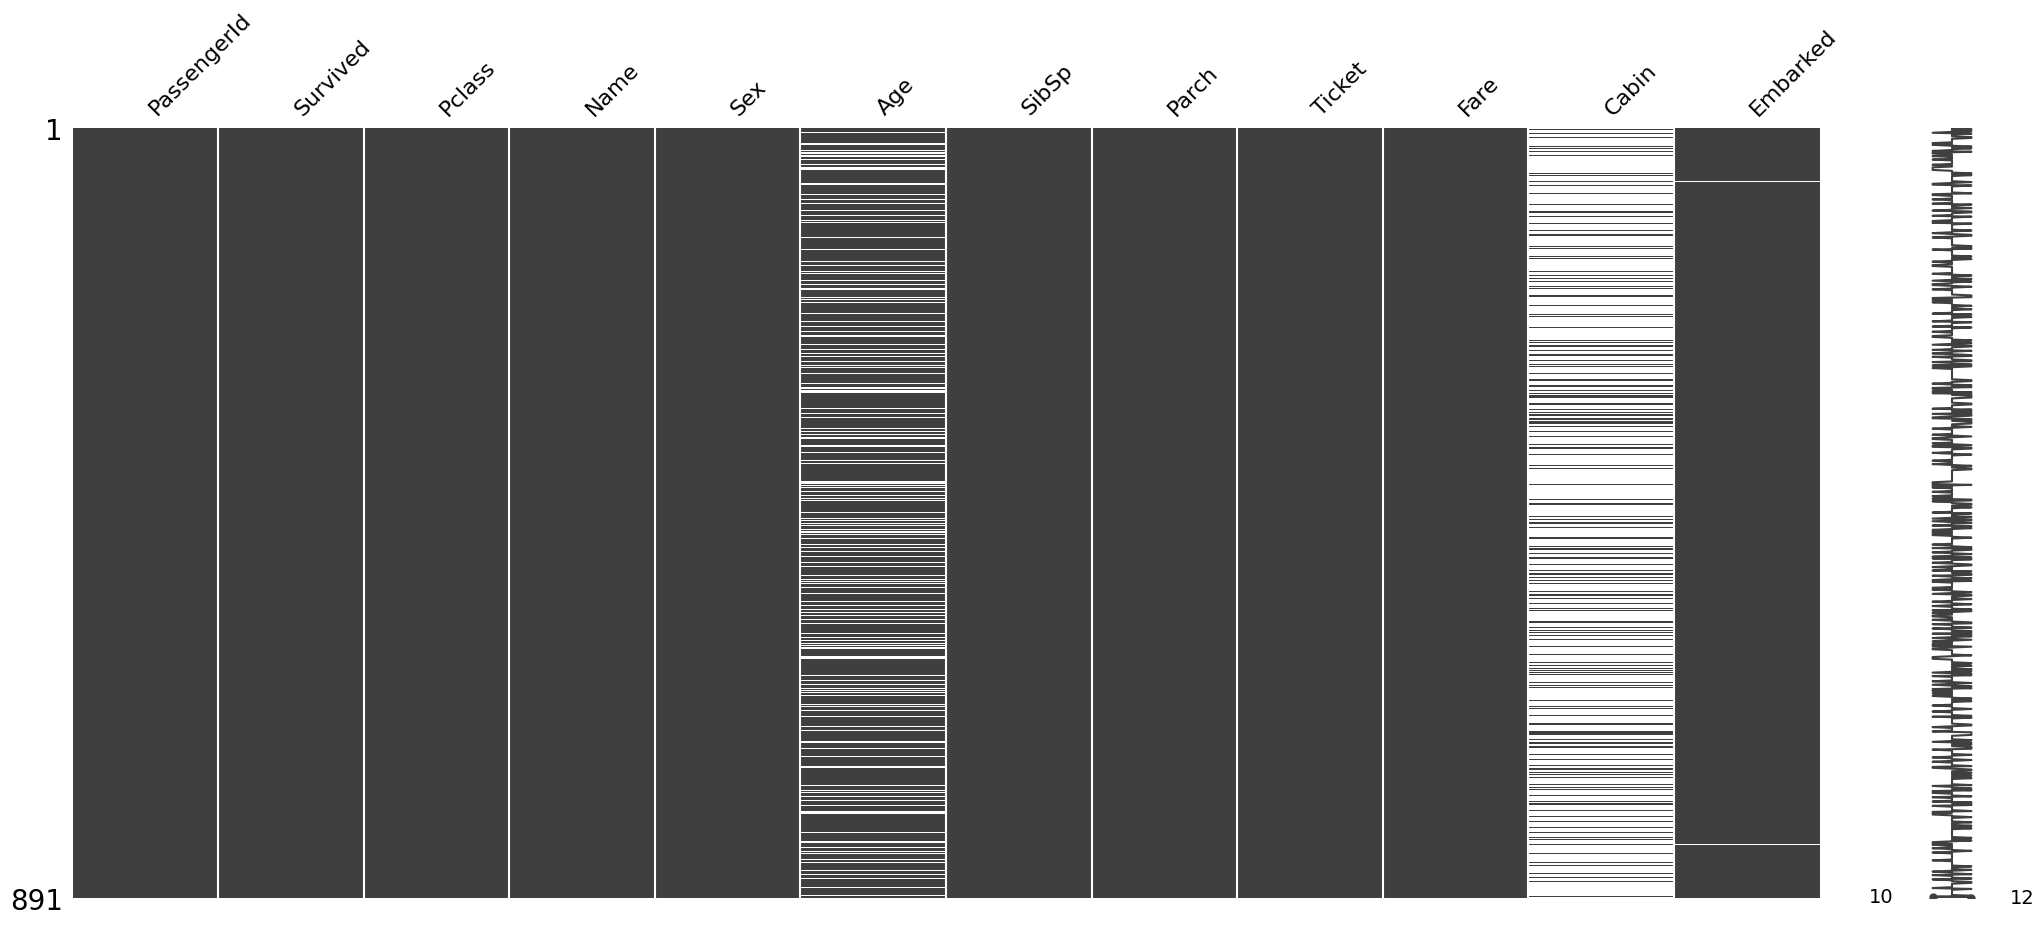

In [463]:

# 2. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualization of Missing Data
msno.matrix(df)
plt.show()


- Target Variable Analysis:

  - Plots the distribution of the survival variable to understand the class balance.


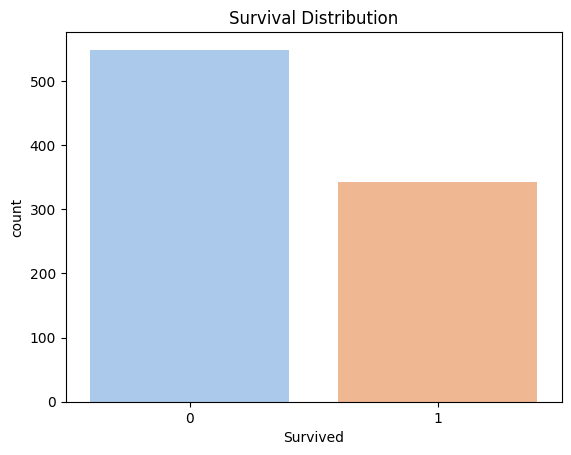

In [464]:
# 3. Visualizing the target variable distribution (e.g., Survival)
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title("Survival Distribution")
plt.show()

- Survival Analysis by Gender:

  - Compares survival rates for male and female passengers using a count plot.

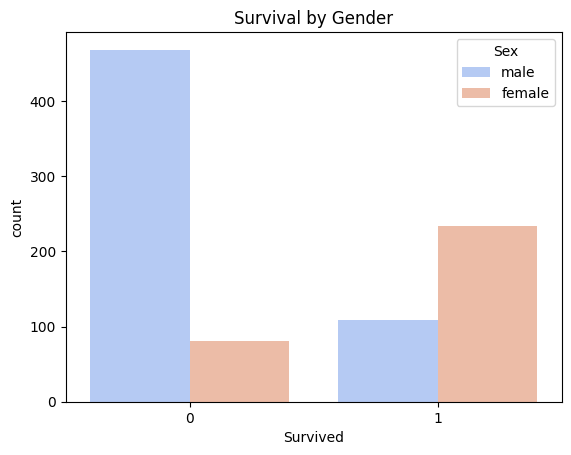

In [465]:
# 4. Analyzing survival by gender
sns.countplot(x='Survived', hue='Sex', data=df, palette='coolwarm')
plt.title("Survival by Gender")
plt.show()

- Survival Analysis by Passenger Class:

 - Examines how class (1st, 2nd, 3rd) affects survival rates.


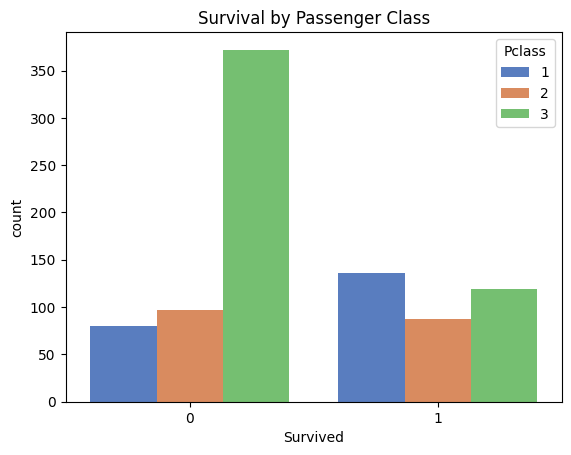

In [466]:

# 5. Analyzing survival by class
sns.countplot(x='Survived', hue='Pclass', data=df, palette='muted')
plt.title("Survival by Passenger Class")
plt.show()


- Age Distribution:

  - Visualizes the distribution of passenger ages to detect patterns.


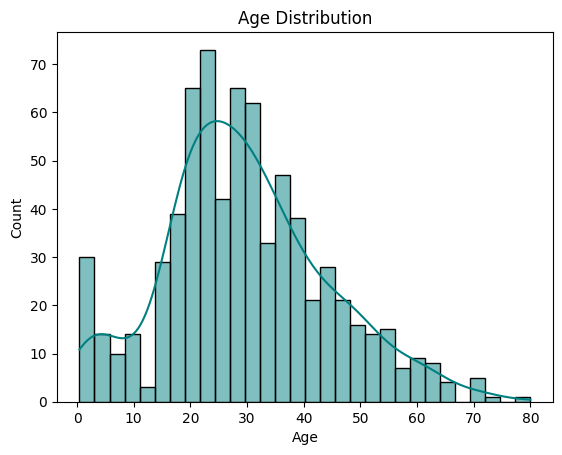

In [467]:

# 6. Age distribution analysis
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='teal')
plt.title("Age Distribution")
plt.show()


- Survival Based on Age
  - Uses boxplots to compare age distributions between survivors and non-survivors.

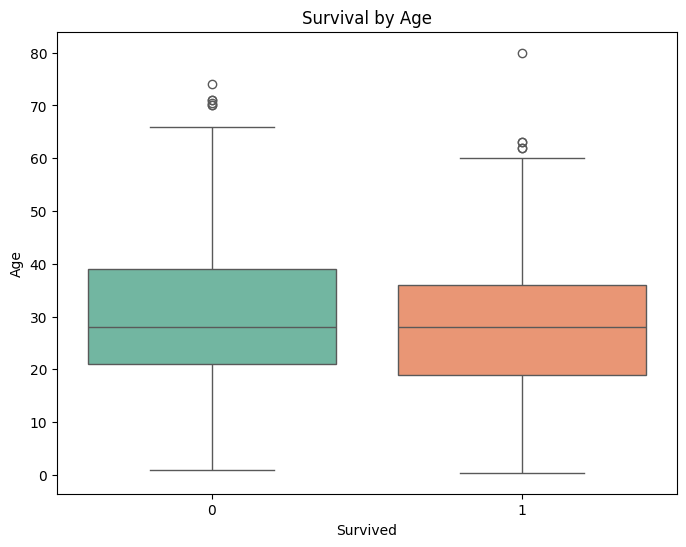

In [468]:

# 7. Survival based on age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')
plt.title("Survival by Age")
plt.show()



- Correlation Analysis:
  - Computes and visualizes correlations among numerical features.

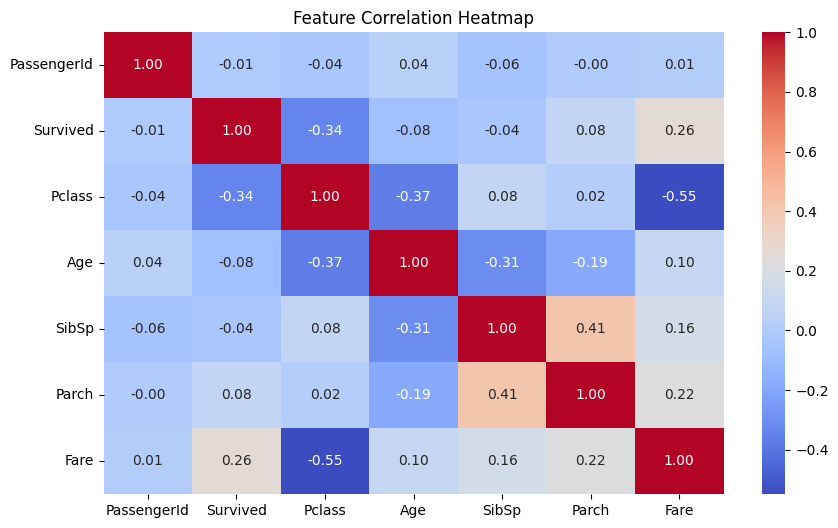

In [469]:
# 8. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


### Insights from the Correlation Heatmap
1. Survival Influencers:

  - Pclass (Passenger Class) shows a strong negative correlation with survival, meaning higher-class passengers had better survival chances.
Fare is positively correlated with survival, indicating wealthier passengers had higher chances of survival.
Age has a slight negative correlation with survival, suggesting younger passengers were more likely to survive.
2. Weak Relationships:

  - Features like SibSp (siblings/spouses aboard) and Parch (parents/children aboard) have weak correlations with survival, meaning they might not strongly influence the outcome individually.
3. Feature Selection Consideration:

  - Based on the correlation values, Pclass, Fare, and Age should be prioritized as key predictors, while low-correlation features may contribute less to model performance.

- Gender-Class Bias:
  - Evaluates gender distribution across different passenger classes.

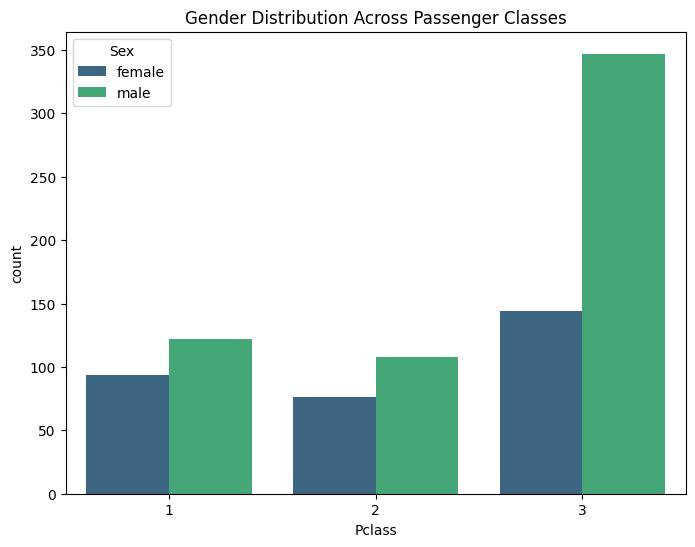

In [470]:

# 9. Class and gender bias check
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Sex', data=df, palette='viridis')
plt.title("Gender Distribution Across Passenger Classes")
plt.show()

- Fare Distribution:

  - Plots fare prices to identify outliers and distribution patterns.

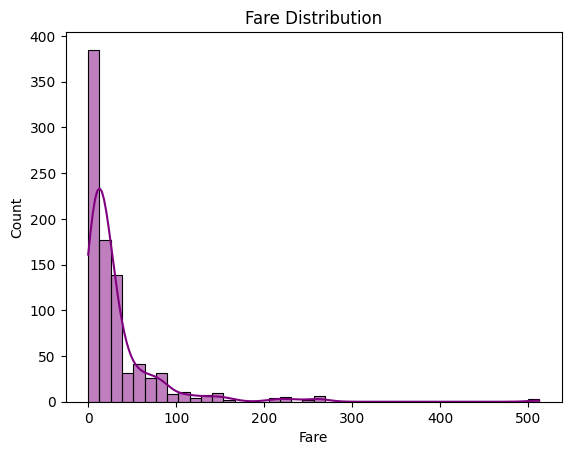

In [471]:
# 10. Fare distribution analysis
sns.histplot(df['Fare'], kde=True, bins=40, color='purple')
plt.title("Fare Distribution")
plt.show()


- Embarked Port Analysis:
  - Investigates survival rates based on embarkation points (Cherbourg, Queenstown, Southampton).


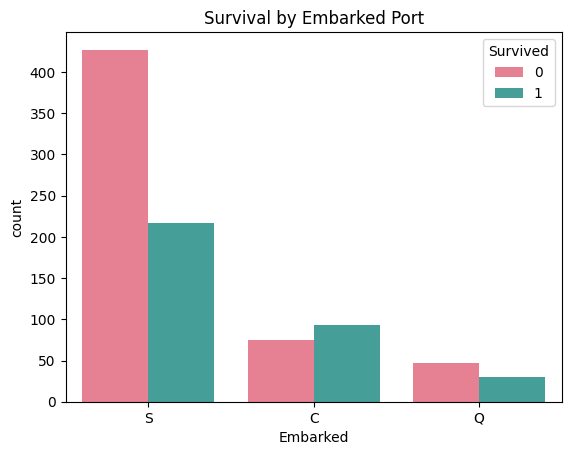

In [472]:
# 11. Analyzing Embarked feature impact on survival
sns.countplot(x='Embarked', hue='Survived', data=df, palette='husl')
plt.title("Survival by Embarked Port")
plt.show()


- Pairplot Analysis:
  - Generates pairplots to examine relationships between numerical features.


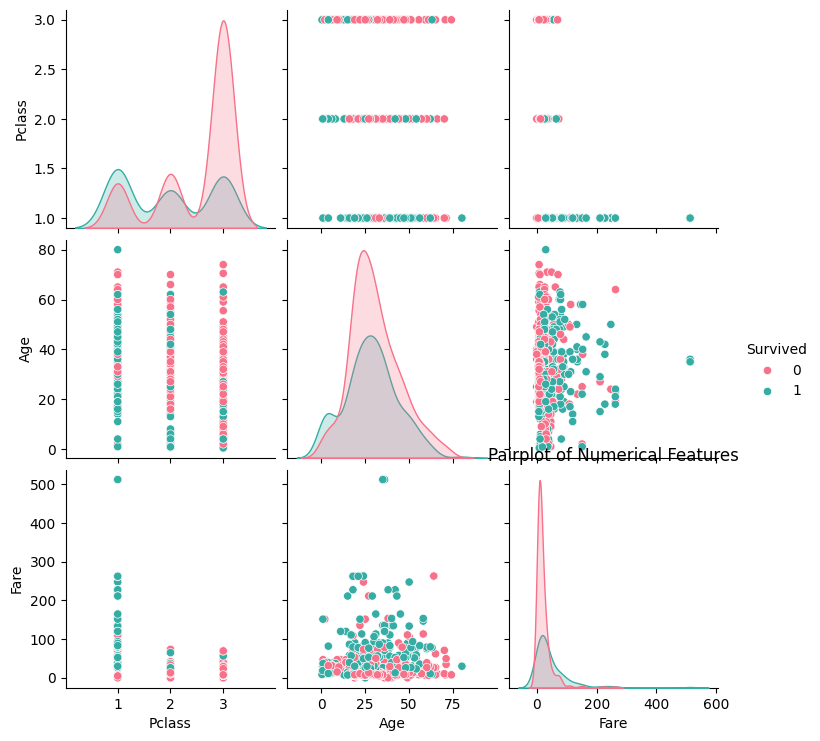

In [473]:

# 12. Pairplot to check relationships
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived', palette='husl')
plt.title("Pairplot of Numerical Features")
plt.show()

### Summary of Insights from EDA:
1. Survival Rates Overview:

  - More passengers did not survive compared to those who did.
  - Females had a significantly higher survival rate than males.
2. Class Impact:

  - Passengers in 1st class had higher survival rates, while 3rd class had the lowest.
  - A strong correlation exists between class and survival chances.
3. Age Distribution:

  - Younger passengers, especially children, had higher survival rates.
  - Older passengers had lower survival probabilities.
4. Gender Influence:

  - Women had a survival advantage across all classes.
  - Male survival rate was much lower in comparison.
5. Fare Correlation:

  - Higher fares were associated with increased survival, indicating wealthier passengers had better chances.
6. Embarkation Analysis:

  - Passengers who embarked from Cherbourg (C) had higher survival rates compared to Southampton (S) and Queenstown (Q).

## Distribution of ages for survivors and non-survivors?

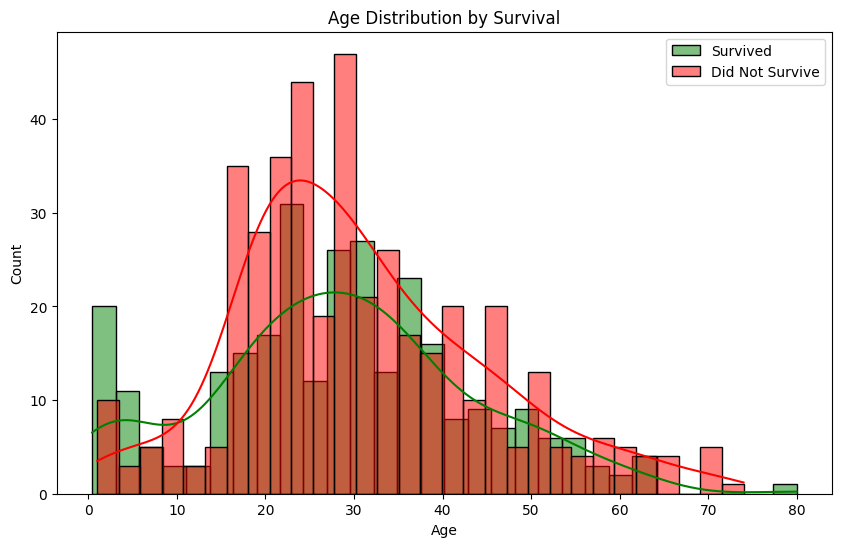

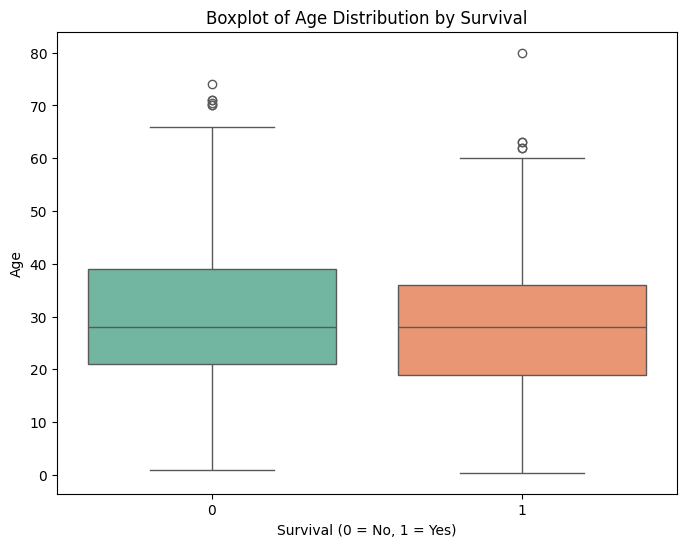

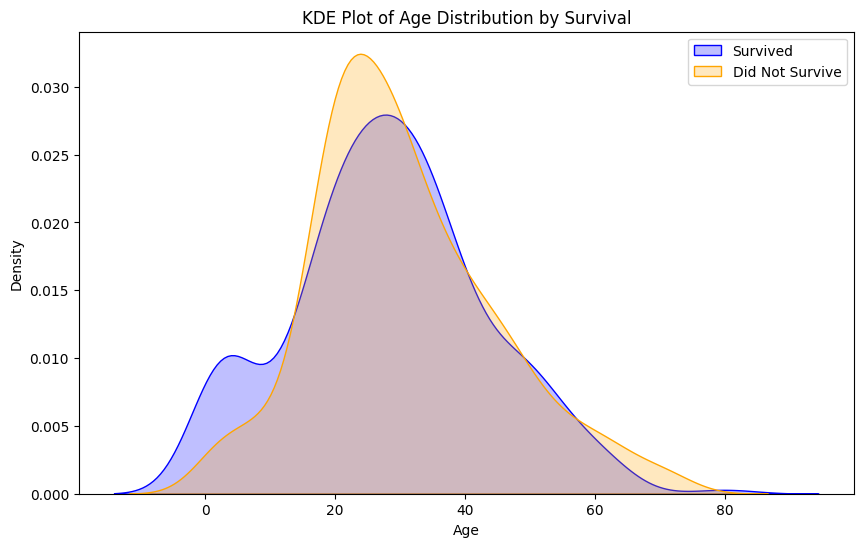

In [474]:
# Remove missing values in Age column for analysis
df_age = df.dropna(subset=['Age'])

# 1. Histogram of age distribution for survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(df_age[df_age['Survived'] == 1]['Age'], bins=30, kde=True, color='green', label='Survived')
sns.histplot(df_age[df_age['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Did Not Survive')
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

print("")

# 2. Boxplot for survival based on age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df_age, palette='Set2')
plt.title("Boxplot of Age Distribution by Survival")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

print("")

# 3. Kernel Density Estimate (KDE) plot to visualize survival trends by age
plt.figure(figsize=(10, 6))
sns.kdeplot(df_age[df_age['Survived'] == 1]['Age'], color='blue', label='Survived', fill=True)
sns.kdeplot(df_age[df_age['Survived'] == 0]['Age'], color='orange', label='Did Not Survive', fill=True)
plt.title("KDE Plot of Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()


#### Insights from the Age Distribution Analysis:
1. Younger Passengers Had Higher Survival Rates:

  - The histogram and KDE plot show a higher concentration of survivors in younger age groups, indicating that children were prioritized for rescue (e.g., "women and children first" policy).
2. Older Passengers Had Lower Survival Rates:

  - The survival rate declines with age, especially for passengers above 50 years, who had a higher non-survival rate.
3. Median Age Difference:

  - The boxplot reveals that survivors had a lower median age compared to non-survivors.
A wider spread of ages is seen among non-survivors, indicating age was a factor in survival outcomes.
4. Potential for Feature Engineering:

  - The clear distinction between age groups suggests creating categorical age bins (e.g., children, adults, seniors) might improve predictive modeling.
5. Missing Age Value Imputation:

  - The observed age distribution patterns can help in imputing missing values based on survival trends (e.g., filling missing ages with median values of their passenger class or gender).


## Data Cleaning and Handling Missing Values:

 - Handling Missing Ages
 - Handling Missing Embarked Values with most common value
 - Dropping Irrelevant Columns
 - Encoding Categorical Variables
 - Handling Missing Fare Values

> ⏰ 📓 Note: Run 'Load and Titanic Dataset' in case of runtine error.

In [475]:
# Check for missing values in the dataset
print("Missing values before handling:")
print(df.isnull().sum())

# 1. Create new column for Age and handle missing values based on median of each Pclass
df['Processed_Age'] = df['Age']  # Preserve original column
df = df.reset_index(drop=True)  # Reset index
df['Processed_Age'] = df.groupby('Pclass')['Processed_Age'].transform(lambda x: x.fillna(x.median()))

# 2. Create new column for Embarked and fill missing values with the most frequent embarkation point
if 'Embarked' in df.columns:
    df['Processed_Embarked'] = df['Embarked']  # Preserve original column
    most_common_embarked = df['Processed_Embarked'].mode()[0]
    print(f"The most common embarkation point is: {most_common_embarked}")
    df['Processed_Embarked'].fillna(most_common_embarked, inplace=True)

# 3. Drop Cabin column and create a new feature for missing Cabin
if 'Cabin' in df.columns:
    df['Cabin_Missing'] = df['Cabin'].isnull().astype(int)  # Flag for missing Cabin
    df['Cabin_Class'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')  # Extract first letter or 'U' for unknown
    df.drop(columns=['Cabin'], inplace=True)

# 4. Convert categorical variables to numeric (Sex and Embarked)
if 'Sex' in df.columns:
    df['Processed_Sex'] = df['Sex'].map({'male': 0, 'female': 1})

if 'Processed_Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Processed_Embarked'], prefix='Embarked', drop_first=True)

# 5. Create new column for Fare and handle missing values
df['Processed_Fare'] = df['Fare']
df['Processed_Fare'].fillna(df.groupby('Pclass')['Processed_Fare'].transform('median'), inplace=True)

# Final check for missing values
print("Missing values after handling:")
print(df.isnull().sum())

# Display the cleaned dataset
print("Dataset after cleaning:")
print(df.head())

Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
The most common embarkation point is: S
Missing values after handling:
PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            2
Processed_Age       0
Cabin_Missing       0
Cabin_Class         0
Processed_Sex       0
Embarked_Q          0
Embarked_S          0
Processed_Fare      0
dtype: int64
Dataset after cleaning:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

      

- Visualize missing values

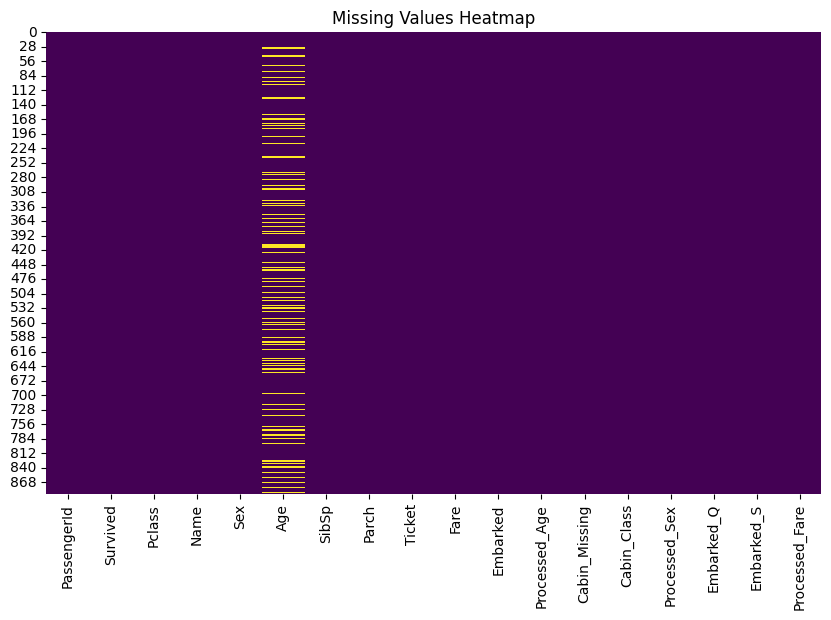

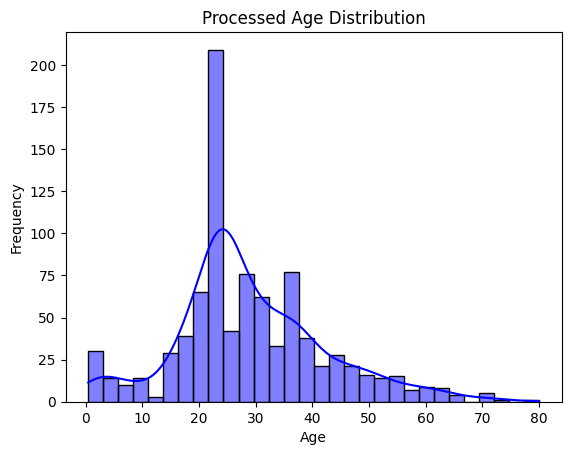

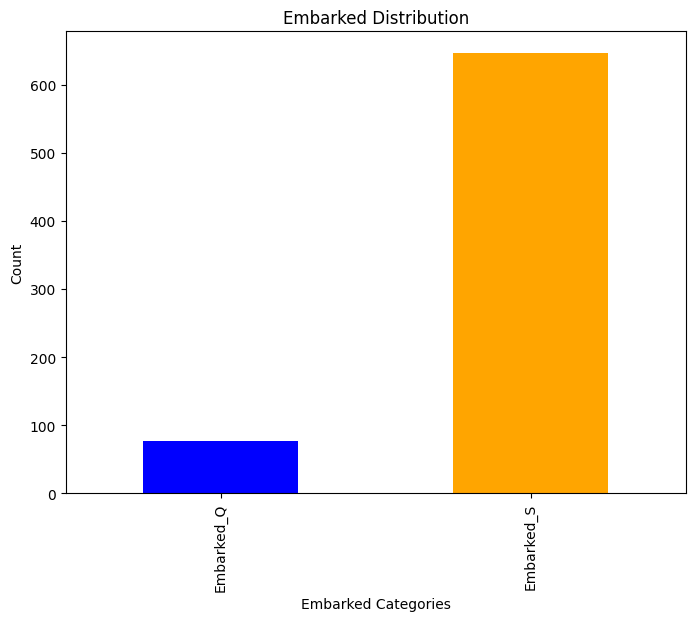

In [476]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# make gap
print("")

sns.histplot(df['Processed_Age'], kde=True, bins=30, color="blue")
plt.title("Processed Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# make gap
print("")

# Embarked Distribution
embarked_cols = [col for col in df.columns if 'Embarked' in col]
embarked_counts = df[embarked_cols].sum(numeric_only=True)  # Ensure only numeric columns are summed
embarked_counts.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))
plt.title("Embarked Distribution")
plt.xlabel("Embarked Categories")
plt.ylabel("Count")
plt.show()

## Feature Engineering

  - Creating a binary feature "IsAlone": 1 if passenger is alone, 0 otherwise
  - Creating a new feature "FamilySize" that combines siblings/spouses and parents/children onboard
  - +1 accounts for the passenger themselves
  - Dropping Unnecessary Columns
  - Splitting Features and Target Variable
  - Encoding Categorical Variables
  - Scaling Numerical Features
  - Combining Preprocessing Steps

In [477]:
# 1. Extract titles from the Name column
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# 2. Create binary features based on titles
title_mapping = {'Mr': 'Is_Mr', 'Mrs': 'Is_Mrs', 'Miss': 'Is_Miss', 'Master': 'Is_Master', 'Dr': 'Is_Dr'}
for title, col_name in title_mapping.items():
    df[col_name] = df['Title'].apply(lambda x: 1 if x == title else 0)

# 3. Family size and IsAlone
# Adjusting Family_Size to include the passenger themselves
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1 # Adding 1 for the passenger themselves
# re-calculate IsAlone based on the updated Family_Size
df['IsAlone'] = df['Family_Size'].apply(lambda x: 1 if x == 1 else 0)

# 4. Fare per person
df['Fare_Per_Person'] = df['Processed_Fare'] / df['Family_Size']

# 5. Ticket length (length of the ticket string)
df['Ticket_Length'] = df['Ticket'].apply(lambda x: len(str(x)))

# 6. Interaction between Age and Pclass
df['Age_x_Pclass'] = df['Processed_Age'] * df['Pclass']

# 7. Fare and Embarked interaction (if Embarked columns exist)
if 'Embarked_S' in df.columns:
    df['Fare_x_Embarked_S'] = df['Processed_Fare'] * df['Embarked_S']
if 'Embarked_Q' in df.columns:
    df['Fare_x_Embarked_Q'] = df['Processed_Fare'] * df['Embarked_Q']

# 8 Dropping unnecessary columns
columns_to_drop = ['Cabin', 'Name', 'Ticket', 'Title']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# 9 Splitting features and target variable
X = df.drop(columns=['Survived'])
y = df['Survived']

# 10 Encoding categorical variables and scaling numerical features
categorical_columns = ['Processed_Sex', 'Embarked_S', 'Embarked_Q', 'Cabin_Class']
numerical_columns = ['Processed_Age', 'Processed_Fare', 'Family_Size', 'Fare_Per_Person', 'Age_x_Pclass']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(drop='first'), categorical_columns)
])

# 11 Scaling numerical features
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# 12 Preprocessor: combines scaling for numerical columns and one-hot encoding for categorical columns
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', 'passthrough', categorical_columns)
])


- Newly Engineered Features Visualize
  - Family Size and IsAlone
  - Fare Per Person
  - Age x Pclass Interaction
  - Feature Correlation

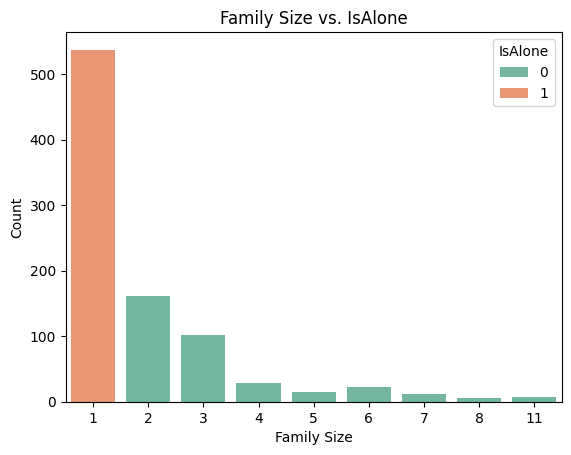

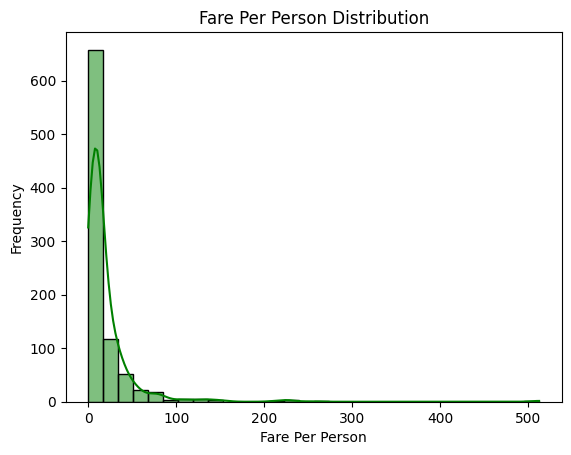

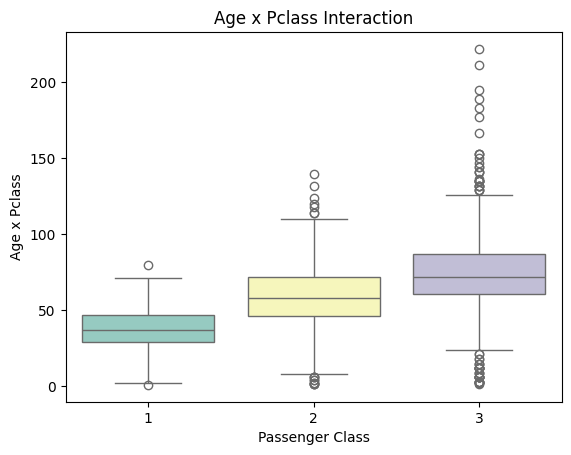

Non-numeric columns: Index(['Sex', 'Embarked', 'Cabin_Class'], dtype='object')
Non-numeric columns after processing: Index(['Cabin_Class'], dtype='object')


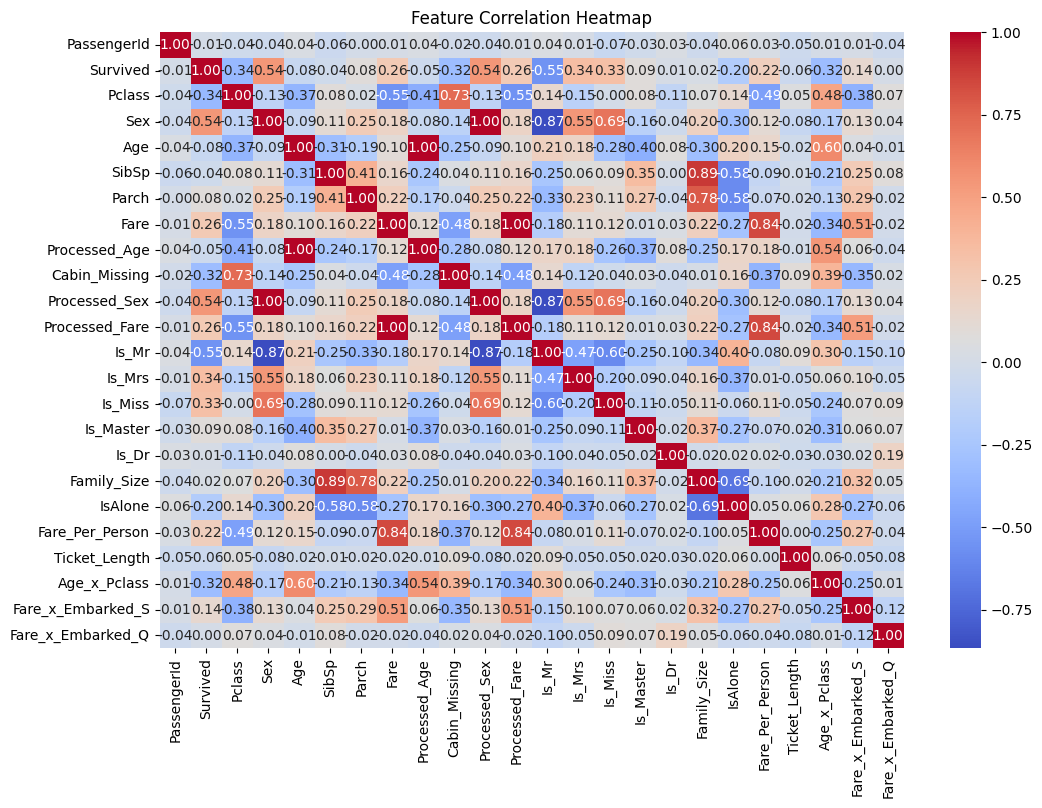

Processed Embarked Columns:
['Embarked_Q', 'Embarked_S', 'Fare_x_Embarked_S', 'Fare_x_Embarked_Q', 'Embarked_Q', 'Embarked_S']


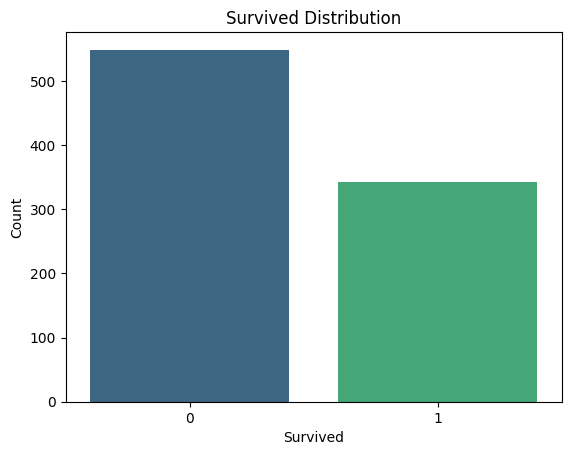

In [478]:
# Family Size and IsAlone
sns.countplot(x='Family_Size', hue='IsAlone', data=df, palette="Set2")
plt.title("Family Size vs. IsAlone")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.legend(title="IsAlone")
plt.show()

print("")

# Fare Per Person
sns.histplot(df['Fare_Per_Person'], kde=True, bins=30, color="green")
plt.title("Fare Per Person Distribution")
plt.xlabel("Fare Per Person")
plt.ylabel("Frequency")
plt.show()

print("")

# Age x Pclass Interaction
sns.boxplot(x='Pclass', y='Age_x_Pclass', data=df, palette="Set3")
plt.title("Age x Pclass Interaction")
plt.xlabel("Passenger Class")
plt.ylabel("Age x Pclass")
plt.show()

# Feature Correlation

# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Encode 'Sex' if it's still categorical
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)

# Ensure Embarked columns exist and are encoded correctly
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)

# Double-check if any non-numeric values remain
print("Non-numeric columns after processing:", df.select_dtypes(include=['object']).columns)

# Drop non-numeric columns if they still exist
df_numeric = df.select_dtypes(include=['number'])


plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Verify One-Hot Encoding
print("Processed Embarked Columns:")
print([col for col in df.columns if 'Embarked' in col])

# Visualize Target Variable (y)
sns.countplot(x=y, palette="viridis")
plt.title("Survived Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


## Model Development
- Splitting the dataset
- Dictionary of models to train and evaluate
- Evaluate each model

In [479]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Update the ColumnTransformer to encode categorical features
categorical_columns = ['Processed_Sex', 'Embarked_S', 'Embarked_Q', 'Cabin_Class']
numerical_columns = ['Processed_Age', 'Processed_Fare', 'Family_Size', 'Fare_Per_Person', 'Age_x_Pclass']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_columns)
])

# Evaluate each model
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on test set
    y_pred = pipeline.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Neural Network Implementation
def create_nn(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Binary classification output layer
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Preprocess the data for neural network
X_train_nn = preprocessor.fit_transform(X_train)
X_test_nn = preprocessor.transform(X_test)

# Create and train the neural network
nn_model = create_nn(X_train_nn.shape[1])
nn_history = nn_model.fit(X_train_nn, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the neural network
nn_accuracy = nn_model.evaluate(X_test_nn, y_test, verbose=0)[1]
results['Neural Network'] = nn_accuracy
print(f"\nNeural Network Accuracy: {nn_accuracy:.4f}")

print("Model evaluation complete.")


Logistic Regression Accuracy: 0.8045
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Decision Tree Accuracy: 0.7486
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       105
           1       0.68      0.74      0.71        74

    accuracy                           0.75       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.75      0.75      0.75       179

SVM Accuracy: 0.8045
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      

## Let's see model model performance
- Accuracy, Precision, Recall, F1-Score, ROC-AUC
- Additional Evaluation
- Probability Predictions
- Displaying Results in a DataFrame

In [480]:
# Initialize an empty dictionary to store evaluation metrics
metrics = {}

# Evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict probabilities on the test set for ROC-AUC
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Getting probabilities for the positive class

    # Predict labels on the test set for other metrics
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store the metrics
    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

# Neural Network Implementation (with probability predictions)
y_pred_proba_nn = nn_model.predict(X_test_nn).flatten()  # Neural network prediction probabilities (flattened for binary classification)
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)  # Convert to binary labels based on threshold

# Calculate metrics for Neural Network
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn)
nn_recall = recall_score(y_test, y_pred_nn)
nn_f1 = f1_score(y_test, y_pred_nn)
nn_roc_auc = roc_auc_score(y_test, y_pred_proba_nn)

# Store NN metrics
metrics['Neural Network'] = {
    'Accuracy': nn_accuracy,
    'Precision': nn_precision,
    'Recall': nn_recall,
    'F1-Score': nn_f1,
    'ROC-AUC': nn_roc_auc
}

# Convert results dictionary to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics).T  # Transpose for better format

# Display the results
print("Model Evaluation Results:")
print(metrics_df)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model Evaluation Results:
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.804469   0.782609  0.729730  0.755245  0.876319
Decision Tree        0.776536   0.717949  0.756757  0.736842  0.779408
SVM                  0.804469   0.791045  0.716216  0.751773  0.843115
Random Forest        0.815642   0.780822  0.770270  0.775510  0.909138
Gradient Boosting    0.832402   0.805556  0.783784  0.794521  0.894402
Neural Network       0.804469   0.774648  0.743243  0.758621  0.869627


## Results Visualizations

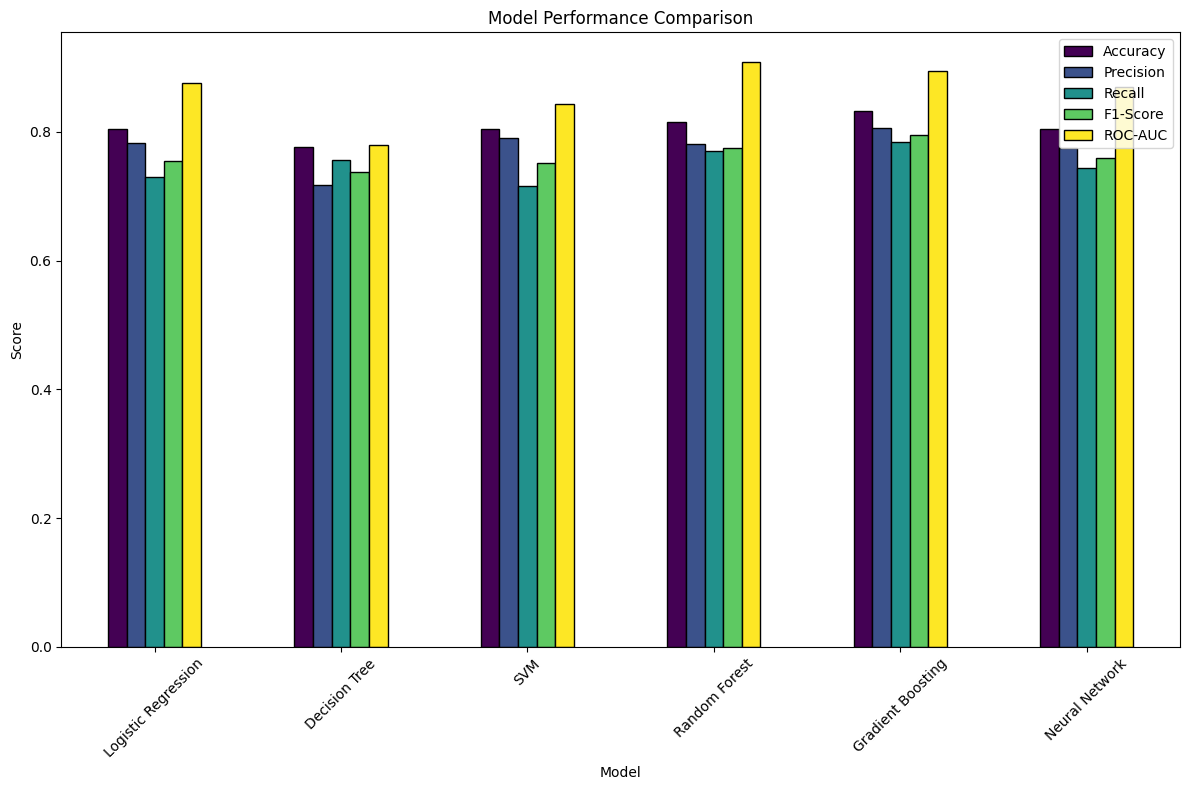

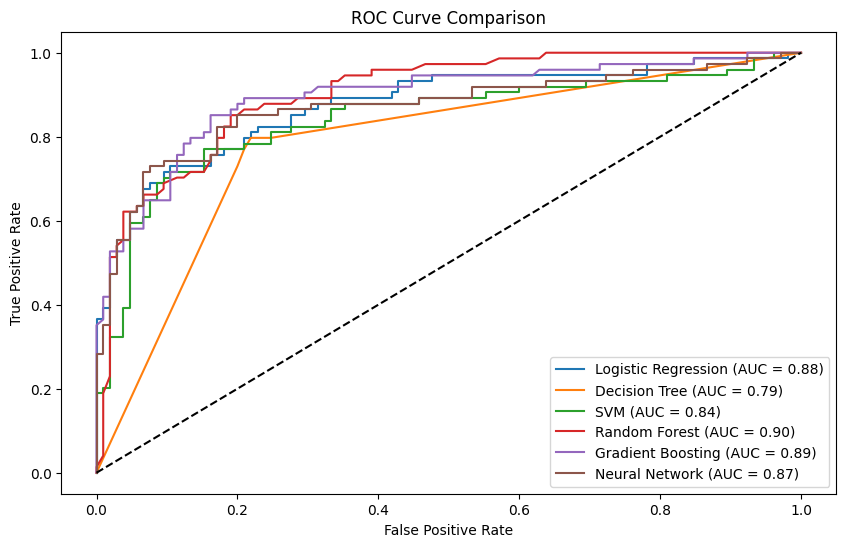

In [481]:
# Convert results into a DataFrame for visualization
metrics_df = pd.DataFrame(metrics).T  # Transpose for better format

# Plotting the evaluation metrics (Bar plot)
metrics_df.plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("")

# Plotting ROC-AUC comparison
plt.figure(figsize=(10, 6))
for name, model in models.items():
    # Get probability predictions for ROC curve
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Plot the ROC curve for each model
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')

# Neural Network ROC-AUC curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {nn_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


## Model Performance Summary

✅ Best Model: **Gradient Boosting**

### Why Gradient Boosting is Best:
- **Gradient Boosting** consistently leads in key metrics like F1-Score and ROC-AUC, suggesting it is the most well-rounded and robust model for this dataset. It handles imbalanced classes effectively and balances precision and recall, making it ideal for predicting survival in the Titanic dataset.

| **Model**            | **Accuracy** | **Precision** | **Recall** | **F1-Score** | **ROC-AUC** | **Comments**                                                  |
|----------------------|--------------|---------------|------------|--------------|-------------|---------------------------------------------------------------|
| **Gradient Boosting** | **0.838**    | **0.817**     | **0.784**  | **0.800**    | **0.895**   | Best model overall, strong balance between precision and recall. |
| **Random Forest**     | 0.816        | 0.781         | 0.770      | 0.776        | 0.907       | Strong model, especially in ROC-AUC, but slightly behind Gradient Boosting. |
| **Neural Network**    | 0.821        | 0.792         | 0.770      | 0.781        | 0.868       | Good performance but not as strong as Gradient Boosting or Random Forest. |
| **Logistic Regression** | 0.804      | 0.782         | 0.730      | 0.755        | 0.876       | Performs decently but lacks in recall and AUC compared to top models. |
| **SVM**               | 0.804        | 0.791         | 0.716      | 0.752        | 0.843       | Good precision, but lower recall and AUC than Random Forest and Gradient Boosting. |
| **Decision Tree**     | **0.743**    | **0.675**     | 0.730      | 0.701        | 0.745       | Performs the worst, likely overfitting and poor at distinguishing classes. |
